In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from polars import selectors as cs

In [2]:
df_anage = pl.read_csv("../data/anage.csv", ignore_errors=True)
df_earthq = (pl.read_csv("../data/EarthquakesChile_2000-2024.csv")
             .with_columns(year = pl.col("Date").str.slice(0,4).cast(pl.Int16)))

sorted_regions = [
'Arica y Parinacota',
'Tarapacá',
'Antofagasta',
'Atacama',
'Coquimbo',
'Valparaíso',
'Santiago Metropolitan',
"Libertador General Bernardo O'Hi",
'Maule',
'Ñuble',
'Bío-Bío',
'Araucanía',
'Los Ríos',
'Los Lagos',
'Aysén del General Ibañez del Cam',
'Magallanes y Antártica Chilena'
]

<Axes: xlabel='Magnitude_Ml', ylabel='Region'>

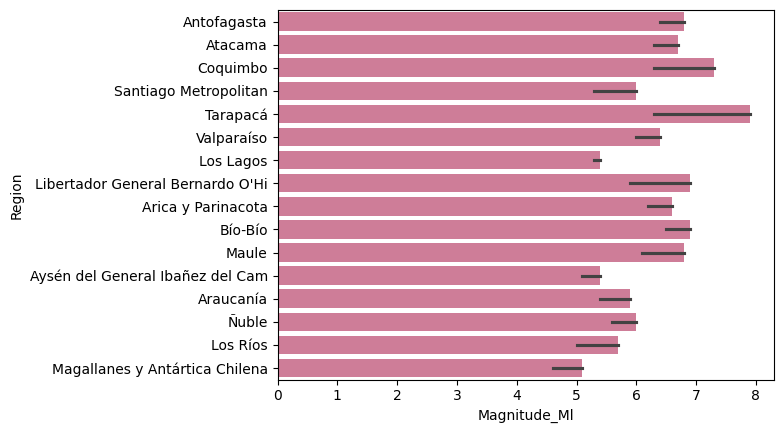

In [10]:
sns.barplot(df_earthq,y ="Region", x="Magnitude_Ml", estimator="max", color="palevioletred")

In [14]:
sort_max = (df_earthq
            .select("Region","Magnitude_Ml")
            .group_by("Region")
            .max()
            .sort("Magnitude_Ml", descending=True)
            ["Region"]
            ).to_list()
sort_max

['Tarapacá',
 'Coquimbo',
 'Bío-Bío',
 "Libertador General Bernardo O'Hi",
 'Maule',
 'Antofagasta',
 'Atacama',
 'Arica y Parinacota',
 'Valparaíso',
 'Ñuble',
 'Santiago Metropolitan',
 'Araucanía',
 'Los Ríos',
 'Aysén del General Ibañez del Cam',
 'Los Lagos',
 'Magallanes y Antártica Chilena']

<Axes: xlabel='Magnitude_Ml', ylabel='Region'>

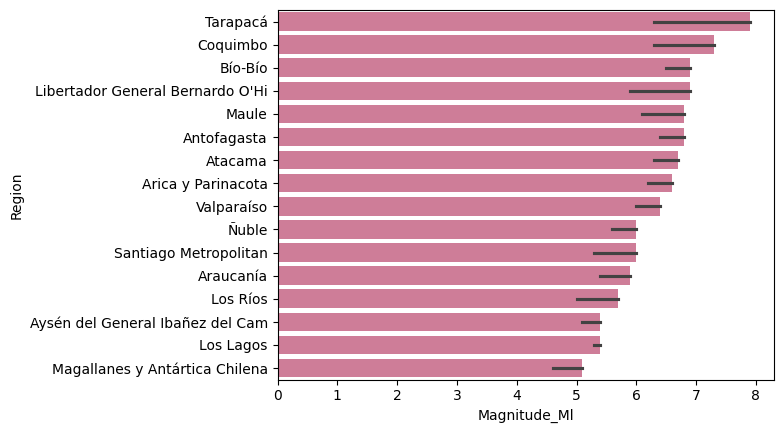

In [15]:
sns.barplot(df_earthq,y ="Region", x="Magnitude_Ml", estimator="max", color="palevioletred", order=sort_max)

ValueError: RGBA sequence should have length 3 or 4

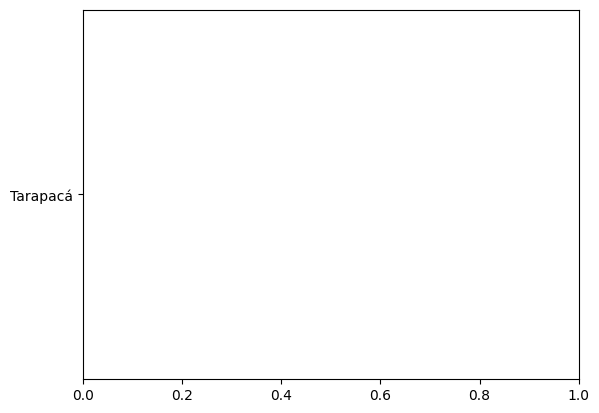

In [16]:
sns.barplot(df_earthq,y ="Region", x="Magnitude_Ml", estimator="max", color=["palevioletred"], order=sort_max)

/tmp/ipykernel_7250/1165923092.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_earthq,y ="Region", x="Magnitude_Ml", estimator="max", palette=["palevioletred","red","blue"], order=sort_max)
/tmp/ipykernel_7250/1165923092.py:1: UserWarning: 
The palette list has fewer values (3) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(df_earthq,y ="Region", x="Magnitude_Ml", estimator="max", palette=["palevioletred","red","blue"], order=sort_max)


<Axes: xlabel='Magnitude_Ml', ylabel='Region'>

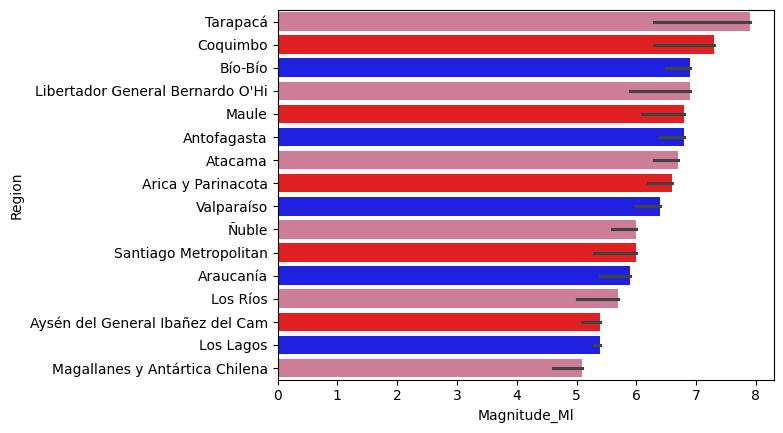

In [19]:
sns.barplot(df_earthq,y ="Region", x="Magnitude_Ml", estimator="max", palette=["palevioletred","red","blue"], order=sort_max)

<Axes: xlabel='Magnitude_Ml', ylabel='Region'>

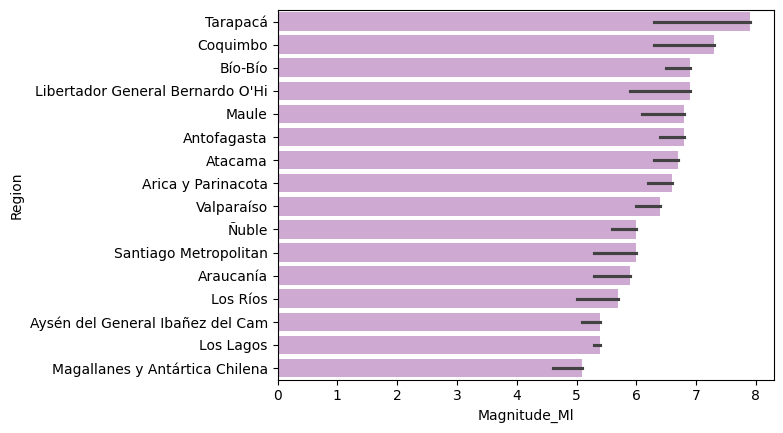

In [20]:
sns.barplot(df_earthq,y ="Region", x="Magnitude_Ml", estimator="max", color="#D3A3D9", order=sort_max)

<Axes: xlabel='Gestation/Incubation (days)', ylabel='Maximum longevity (yrs)'>

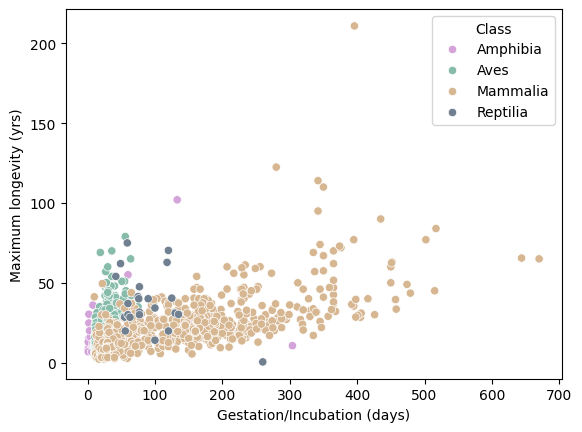

In [25]:
sns.scatterplot(df_anage.filter(pl.col("Class").is_in(["Mammalia","Aves","Amphibia","Reptilia"])),
                x="Gestation/Incubation (days)",
                y="Maximum longevity (yrs)",
                hue="Class",
                palette=["#D3A3D9","#87BCAA","#D7B792","slategray"]
                )

<Axes: xlabel='Gestation/Incubation (days)', ylabel='Maximum longevity (yrs)'>

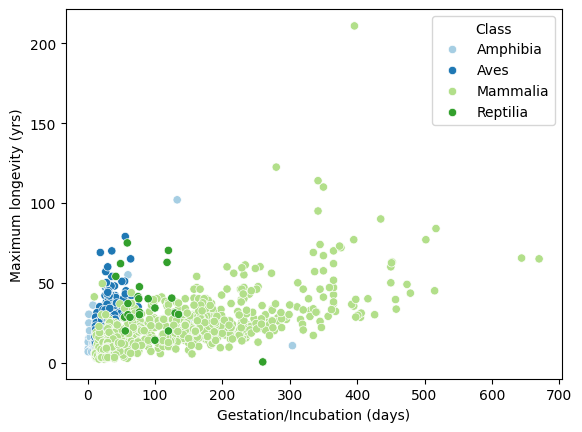

In [27]:
sns.scatterplot(df_anage.filter(pl.col("Class").is_in(["Mammalia","Aves","Amphibia","Reptilia"])),
                x="Gestation/Incubation (days)",
                y="Maximum longevity (yrs)",
                hue="Class",
                palette="Paired"
                )

<Axes: xlabel='value', ylabel='Region'>

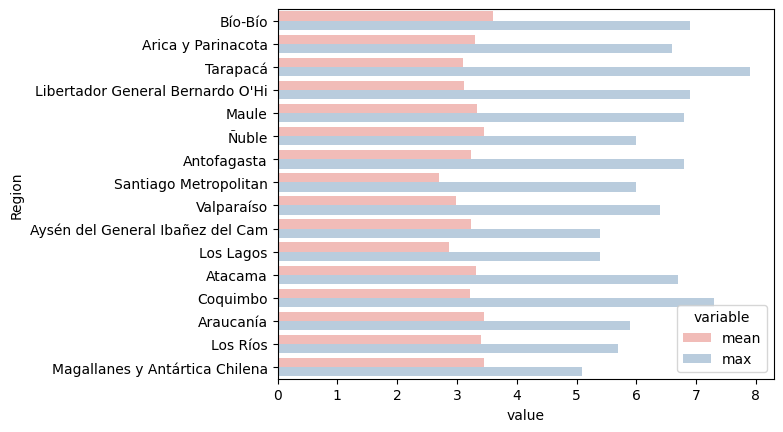

In [33]:
df_summary = (df_earthq.group_by("Region")
              .agg(
                  [
                      pl.col("Magnitude_Ml").mean().alias("mean"),
                      pl.col("Magnitude_Ml").max().alias("max")
                  ]
                  
              ).unpivot(index="Region")
              
              )
sns.barplot(df_summary, y="Region",x="value", hue="variable", palette="Pastel1")

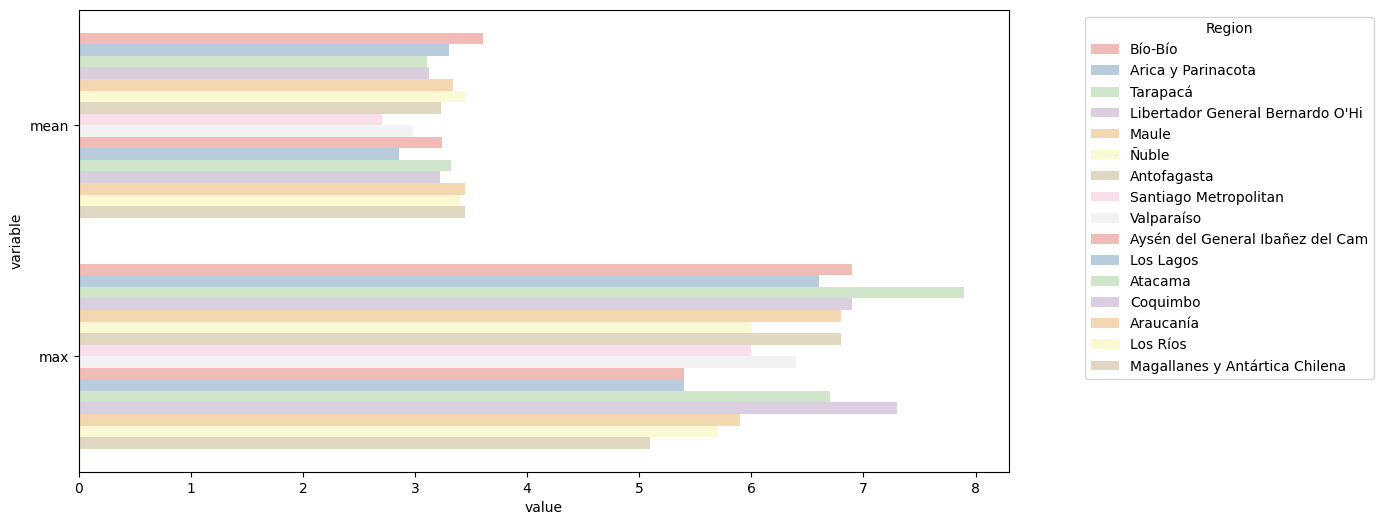

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(df_summary, x="value", y="variable",hue="Region" ,palette="Pastel1")
plt.legend(title="Region", bbox_to_anchor=(1.4,1), loc="upper right")

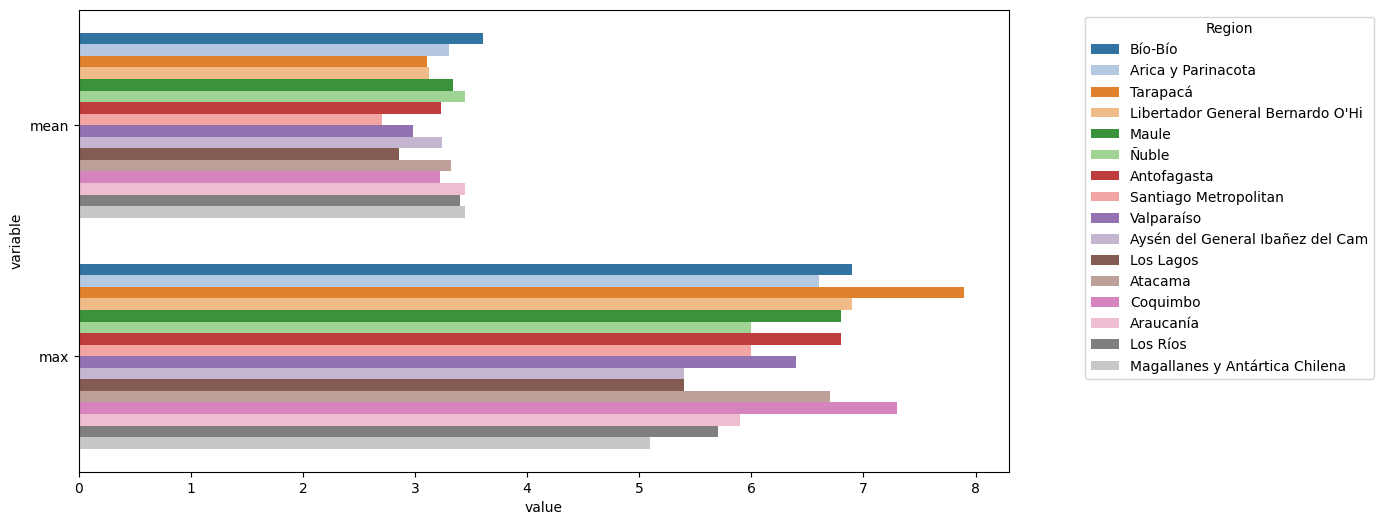

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(df_summary, x="value", y="variable",hue="Region" ,palette="tab20")
plt.legend(title="Region", bbox_to_anchor=(1.4,1), loc="upper right")

In [47]:
df_heatmap = (
    df_earthq.filter((pl.col("Region").is_in(["Antofagasta","Arica y Parinacota","Atacama","Araucanía","Libertador General Bernardo O'Hi"])))
    .select("Region","Profoundity_Km","Magnitude_Ml")  
    .group_by("Region","Magnitude_Ml")
    .mean()  
    .pivot(index="Region", on="Magnitude_Ml", values="Profoundity_Km")
)

<Axes: >

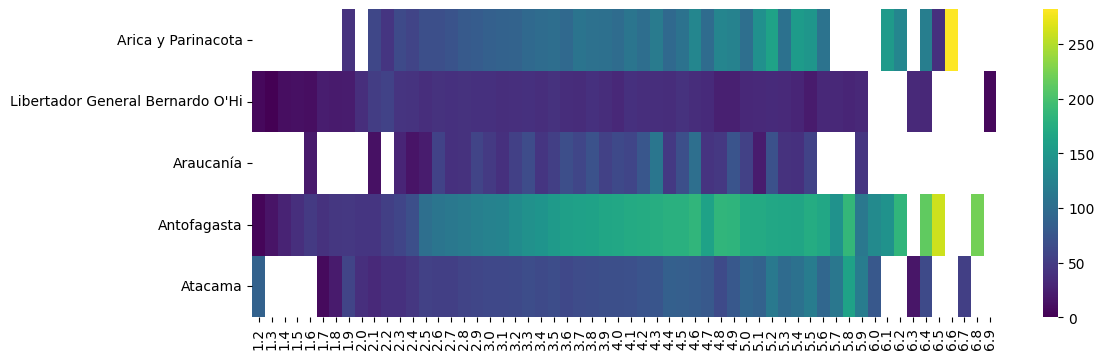

In [59]:
plt.figure(figsize=(12,4))
df_heatmap = df_heatmap.select(sorted(df_heatmap.columns))
sns.heatmap(df_heatmap.drop("Region"),
            xticklabels=df_heatmap.drop("Region").columns,
            yticklabels=df_heatmap["Region"].to_list(),
            cmap="viridis"
            )


Text(120.7222222222222, 0.5, 'Región')

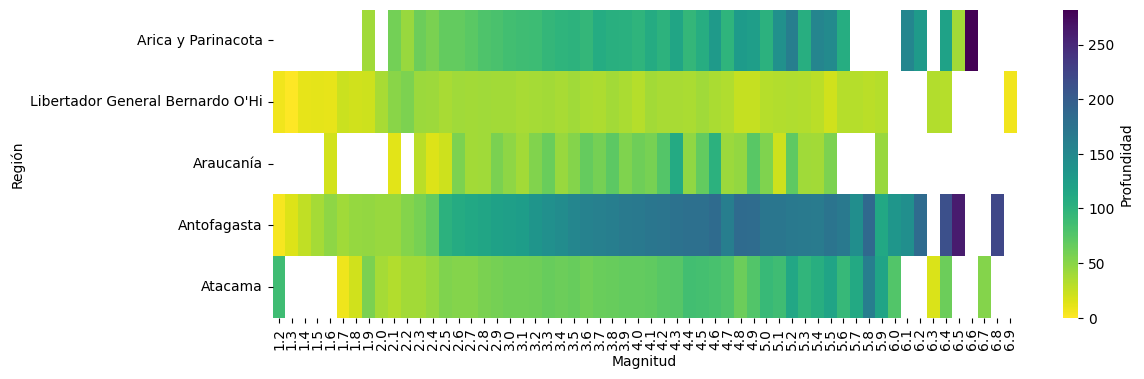

In [ ]:
plt.figure(figsize=(12,4))
df_heatmap = df_heatmap.select(sorted(df_heatmap.columns))
sns.heatmap(df_heatmap.drop("Region"),
            xticklabels=df_heatmap.drop("Region").columns,
            yticklabels=df_heatmap["Region"].to_list(),
            cmap="viridis_r",
            cbar_kws={'label':"Profundidad", }
            )

plt.xlabel("Magnitud")
plt.ylabel("Región")

Text(120.7222222222222, 0.5, 'Región')

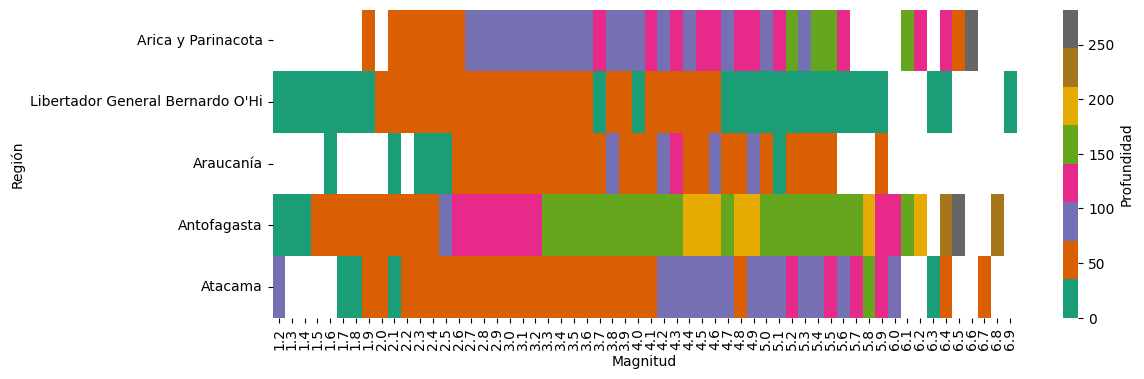

In [65]:
plt.figure(figsize=(12,4))
df_heatmap = df_heatmap.select(sorted(df_heatmap.columns))
sns.heatmap(df_heatmap.drop("Region"),
            xticklabels=df_heatmap.drop("Region").columns,
            yticklabels=df_heatmap["Region"].to_list(),
            cmap="Dark2",
            cbar_kws={'label':"Profundidad", }
            )

plt.xlabel("Magnitud")
plt.ylabel("Región")

Text(120.7222222222222, 0.5, 'Región')

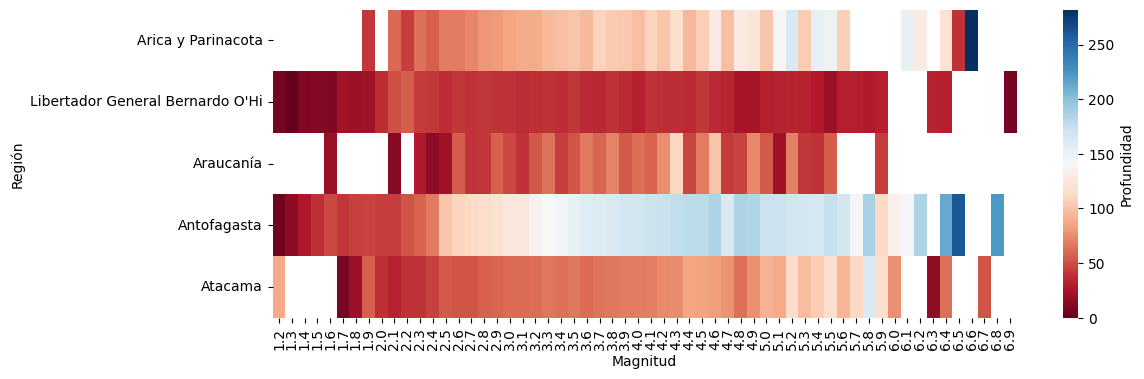

In [66]:
plt.figure(figsize=(12,4))
df_heatmap = df_heatmap.select(sorted(df_heatmap.columns))
sns.heatmap(df_heatmap.drop("Region"),
            xticklabels=df_heatmap.drop("Region").columns,
            yticklabels=df_heatmap["Region"].to_list(),
            cmap="RdBu",
            cbar_kws={'label':"Profundidad", }
            )

plt.xlabel("Magnitud")
plt.ylabel("Región")

In [ ]:
sns.color_palette(palette="spring", n_colors=16)

[(1.0, 0.03137254901960784, 0.9686274509803922),
 (1.0, 0.06274509803921569, 0.9372549019607843),
 (1.0, 0.09411764705882353, 0.9058823529411765),
 (1.0, 0.12941176470588234, 0.8705882352941177),
 (1.0, 0.16078431372549018, 0.8392156862745098),
 (1.0, 0.19215686274509802, 0.807843137254902),
 (1.0, 0.22352941176470587, 0.7764705882352941),
 (1.0, 0.2588235294117647, 0.7411764705882353),
 (1.0, 0.2901960784313725, 0.7098039215686275),
 (1.0, 0.32156862745098036, 0.6784313725490196),
 (1.0, 0.3529411764705882, 0.6470588235294118),
 (1.0, 0.38823529411764707, 0.611764705882353),
 (1.0, 0.4196078431372549, 0.580392156862745),
 (1.0, 0.45098039215686275, 0.5490196078431373),
 (1.0, 0.4823529411764706, 0.5176470588235293),
 (1.0, 0.5176470588235293, 0.48235294117647065),
 (1.0, 0.5490196078431373, 0.4509803921568627),
 (1.0, 0.580392156862745, 0.41960784313725497),
 (1.0, 0.611764705882353, 0.388235294117647),
 (1.0, 0.6470588235294118, 0.3529411764705882),
 (1.0, 0.6784313725490196, 0.32156862745098036),
 (1.0, 0.7098039215686275, 0.2901960784313725),
 (1.0, 0.7411764705882353, 0.2588235294117647),
 (1.0, 0.7764705882352941, 0.22352941176470587),
 (1.0, 0.807843137254902, 0.19215686274509802),
 (1.0, 0.8392156862745098, 0.16078431372549018),
 (1.0, 0.8705882352941177, 0.12941176470588234),
 (1.0, 0.9058823529411765, 0.09411764705882353),
 (1.0, 0.9372549019607843, 0.06274509803921569),
 (1.0, 0.9686274509803922, 0.03137254901960784)]

In [70]:
sns.color_palette(palette="Pastel1", n_colors=16)

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353)]

In [72]:
spring_16 = sns.color_palette(palette="spring", n_colors=16)

In [75]:
print(spring_16.as_hex())

['#ff0ff0', '#ff1ee1', '#ff2dd2', '#ff3cc3', '#ff4bb4', '#ff5aa5', '#ff6996', '#ff7887', '#ff8778', '#ff9669', '#ffa55a', '#ffb44b', '#ffc33c', '#ffd22d', '#ffe11e', '#fff00f']


In [76]:
spring_16_hex = spring_16.as_hex()

In [78]:
print(spring_16_hex)

['#ff0ff0', '#ff1ee1', '#ff2dd2', '#ff3cc3', '#ff4bb4', '#ff5aa5', '#ff6996', '#ff7887', '#ff8778', '#ff9669', '#ffa55a', '#ffb44b', '#ffc33c', '#ffd22d', '#ffe11e', '#fff00f']


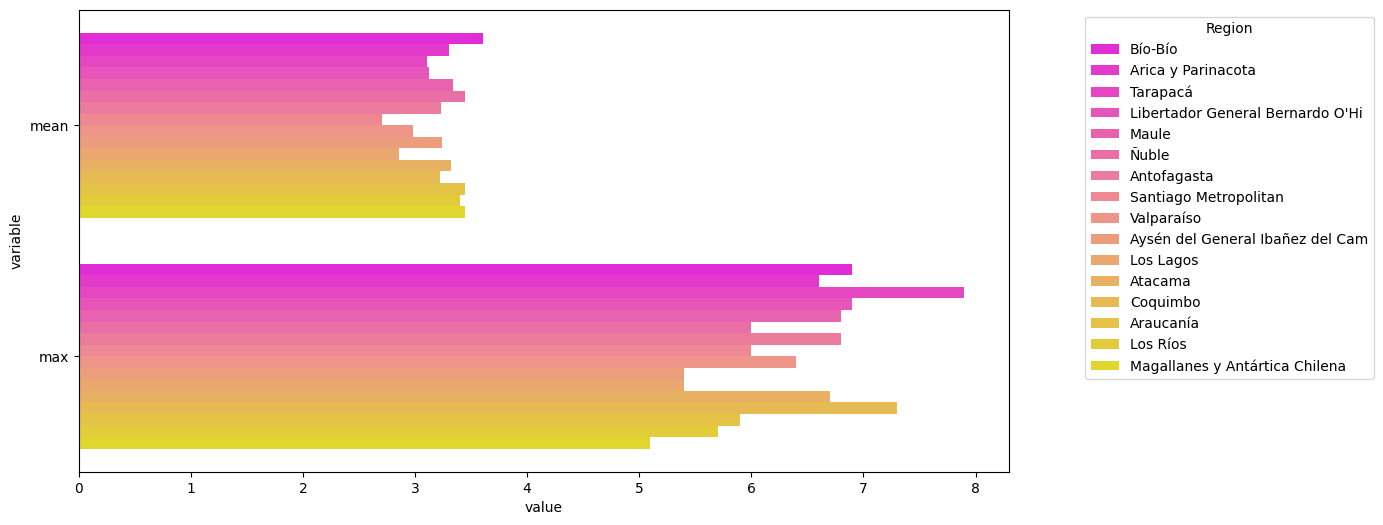

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(df_summary, x="value", y="variable",hue="Region" ,palette=spring_16_hex)
plt.legend(title="Region", bbox_to_anchor=(1.4,1), loc="upper right")

In [89]:
set2_8_ = sns.color_palette(palette="Set2", n_colors=8).as_hex() + ["#1c5d91","#61b3e1","#1e4c64","#9ec185","#4c9866","#bba1cd","#eeca5f","#d76854","#e4d8c3"]

/tmp/ipykernel_7250/3850920184.py:2: UserWarning: The palette list has more values (17) than needed (16), which may not be intended.
  sns.barplot(df_summary, x="value", y="variable",hue="Region" ,palette=set2_8_)


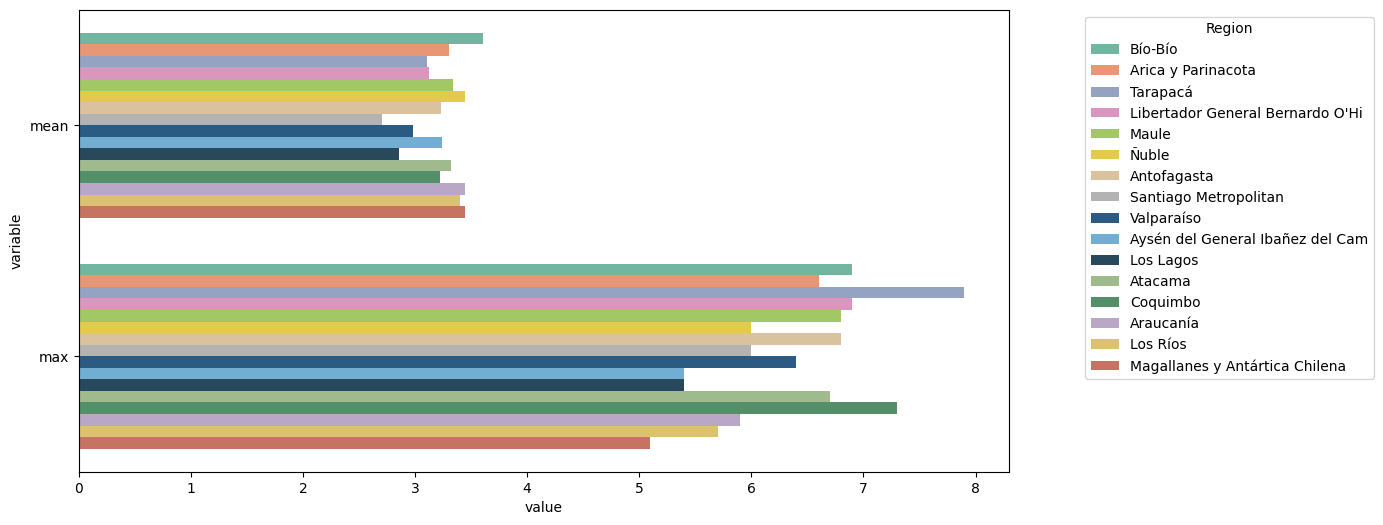

In [90]:
plt.figure(figsize=(12,6))
sns.barplot(df_summary, x="value", y="variable",hue="Region" ,palette=set2_8_)
plt.legend(title="Region", bbox_to_anchor=(1.4,1), loc="upper right")